In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables del dataset, ver si hay outliers o anomalías (que no tienen que ser errores necesariamente 👀 ), y ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior. Las nubes de palabras dan una buena idea de cuáles palabras son más frecuentes en los títulos, ¡podría ayudar al sistema de predicción! En esta ocasión vamos a pedirte que no uses librerías para hacer EDA automático ya que queremos que pongas en práctica los conceptos y tareas involucrados en el mismo. Puedes leer un poco más sobre EDA en este articulo

# Cargamos los archivos parquet 

In [2]:
review = pd.read_parquet("clean_review")
items = pd.read_parquet("clean_items")
steam = pd.read_parquet("clean_steam_games")

Unimos nuestros archivos para una mejor vision de la información 

In [4]:
review_y_steam = pd.merge(review, steam, on="item_id")

In [3]:
items_y_steam = pd.merge(items, steam, on= "item_id")

In [13]:
review_y_steam.info() # veo la información mas detallada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53988 entries, 0 to 53987
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    53988 non-null  object 
 1   item_id                    53988 non-null  float64
 2   recommend                  53988 non-null  object 
 3   sentiment_analysis         53988 non-null  int64  
 4   Año_posteo                 53988 non-null  int64  
 5   app_name                   53988 non-null  object 
 6   price                      53976 non-null  float64
 7   developer                  50361 non-null  object 
 8   Accounting                 53988 non-null  int64  
 9   Action                     53988 non-null  int64  
 10  Adventure                  53988 non-null  int64  
 11  Animation &amp; Modeling   53988 non-null  int64  
 12  Audio Production           53988 non-null  int64  
 13  Casual                     53988 non-null  int

In [14]:
items_y_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4294257 entries, 0 to 4294256
Data columns (total 32 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   user_id                    object 
 1   items_count                int64  
 2   item_id                    float64
 3   item_name                  object 
 4   playtime_forever           float64
 5   playtime_2weeks            float64
 6   app_name                   object 
 7   price                      float64
 8   developer                  object 
 9   Accounting                 int64  
 10  Action                     int64  
 11  Adventure                  int64  
 12  Animation &amp; Modeling   int64  
 13  Audio Production           int64  
 14  Casual                     int64  
 15  Design &amp; Illustration  int64  
 16  Early Access               int64  
 17  Education                  int64  
 18  Free to Play               int64  
 19  Indie                      int64  
 20  Ma

### **`Comienzo a trabajar solo en la tabla de reviews con steam`** 

In [8]:
review_y_steam.head(1) #observo que columnas me sirven para el eda

,user_id,item_id,recommend,sentiment_analysis,Año_posteo,app_name,price,developer,Accounting,Action,...,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,Año_lanzamiento
0,76561197970982479,1250.0,True,2,2011,Killing Floor,19.99,Tripwire Interactive,0,1,...,0,0,0,0,0,0,0,0,0,2009.0


In [11]:
review1 = review_y_steam.drop(columns=["Año_posteo","Año_lanzamiento"]) #elimino las columnas que no utilizo para el eda

In [16]:
review1.head(1)

,user_id,item_id,recommend,sentiment_analysis,app_name,price,developer,Accounting,Action,Adventure,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,76561197970982479,1250.0,True,2,Killing Floor,19.99,Tripwire Interactive,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Developer con mas usuarios 

In [39]:
df = review1.groupby("developer")["user_id"].count().sort_values(ascending=False).reset_index()
# Lo agrupo por developer, hago un conteo de usuarios y lo ordeno de mayor a menor 

In [51]:
df.isna().value_counts()

developer  user_id
False      False      2108
Name: count, dtype: int64

In [47]:
Top5_dev = df.head(5) # Tomo los primero 5 developer con mas usuarios

In [48]:
Top5_dev

,developer,user_id
0,Valve,9697
1,Facepunch Studios,2550
2,Bohemia Interactive,1161
3,Smartly Dressed Games,1066
4,Re-Logic,741


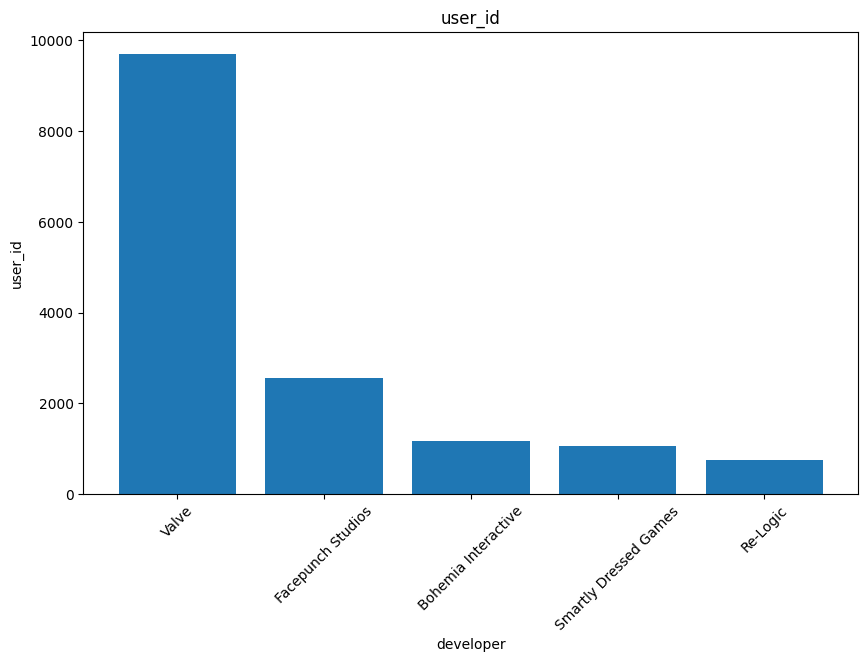

In [55]:

# Creo un grafico de barras para el top 5 de developer con mas usuarios
plt.figure(figsize=(10, 6))
plt.bar(Top5_dev["developer"], Top5_dev["user_id"])
plt.xlabel("developer")
plt.ylabel("user_id")
plt.title("user_id")
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x para mayor legibilidad

plt.show()


# Juegos con mayor recomendacion

In [56]:
review1.head(1)

,user_id,item_id,recommend,sentiment_analysis,app_name,price,developer,Accounting,Action,Adventure,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,76561197970982479,1250.0,True,2,Killing Floor,19.99,Tripwire Interactive,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
juegos_recom = review1[["app_name","recommend"]] # tomamos las columnas necesarias 

In [72]:
juegos_recom.value_counts() # veo los valores encontrados

app_name                              recommend
Team Fortress 2                       True         3611
Counter-Strike: Global Offensive      True         3478
Garry's Mod                           True         1685
Dota 2                                True         1458
Unturned                              True          961
                                                   ... 
LEGO® Jurassic World                  False           1
                                      True            1
LEGO® MARVEL's Avengers               True            1
LEGO® Star Wars™ - The Complete Saga  False           1
Астролорды: Облако Оорта              True            1
Name: count, Length: 4230, dtype: int64

In [62]:
juegos_recom

,app_name,recommend
0,Killing Floor,True
1,Killing Floor,True
2,Killing Floor,True
3,Killing Floor,True
4,Killing Floor,True
...,...,...
53983,Asteria,True
53984,Street Fighter X Tekken,True
53985,The Journey Down: Chapter One,True
53986,The Journey Down: Chapter Two,True


In [83]:
#Filtro por si hubo recomendacion, lo agrupo por nombre de juego 
mayor_recom = juegos_recom[juegos_recom["recommend"] == True].groupby("app_name").sum().sort_values("recommend",ascending=False).reset_index()

In [183]:
top5 = mayor_recom.head(5)  # Busco los 10 primeros juegos con mayor recomendacion

In [184]:
top5

,app_name,recommend
0,Team Fortress 2,3611
1,Counter-Strike: Global Offensive,3478
2,Garry's Mod,1685
3,Dota 2,1458
4,Unturned,961


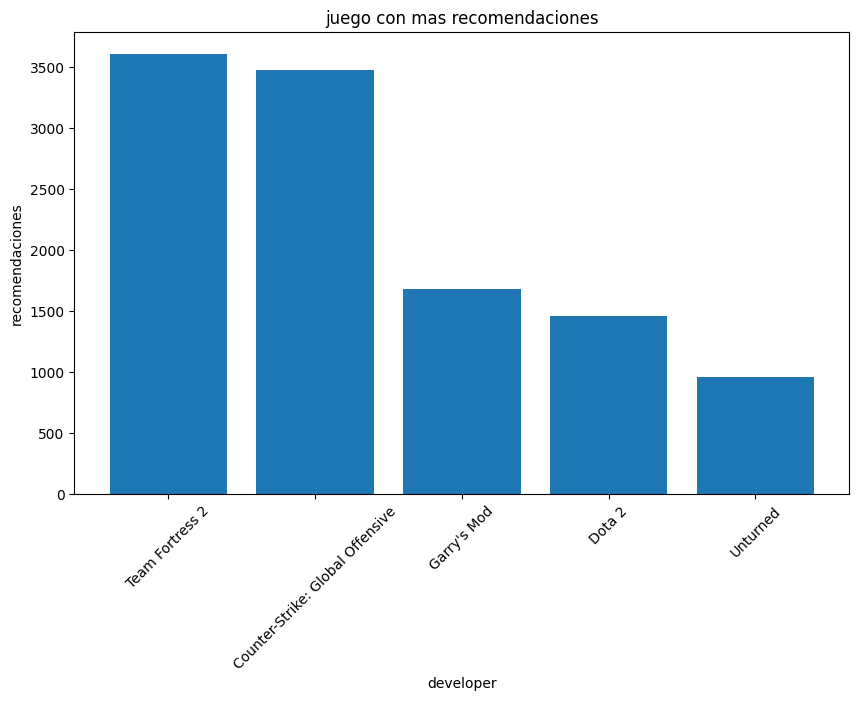

In [185]:

# Creo un grafico de barras para el top 8 juegos con mayor recomendacion
plt.figure(figsize=(10, 6))
plt.bar(top5["app_name"], top5["recommend"])
plt.xlabel("developer")
plt.ylabel("recomendaciones")
plt.title("juego con mas recomendaciones")
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x para mayor legibilidad

plt.show()

# Cantidad de tipo por sentimiento de analisis

In [90]:
review1.head(1)

,user_id,item_id,recommend,sentiment_analysis,app_name,price,developer,Accounting,Action,Adventure,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,76561197970982479,1250.0,True,2,Killing Floor,19.99,Tripwire Interactive,0,1,0,...,0,0,0,0,0,0,0,0,0,0


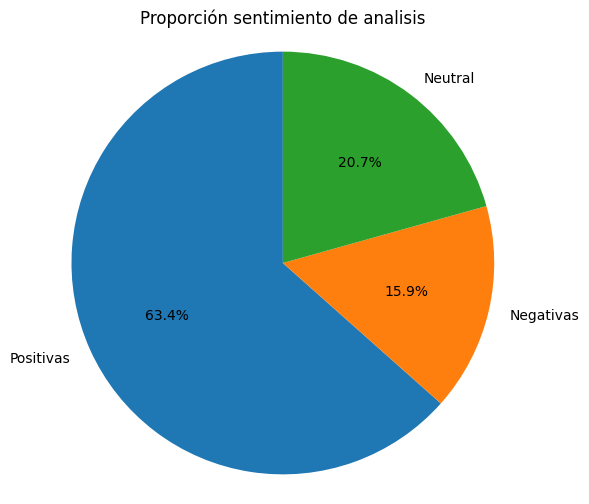

In [98]:
plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico

#Contar el número de sentimiento de analisis positivas, negativas y neutral
num_positivas = len(review1[review1["sentiment_analysis"] == 2])
num_neutral = len(review1[review1["sentiment_analysis"] == 1])
num_negativas = len(review1[review1["sentiment_analysis"] == 0])

#Graficar los datos
plt.pie([num_positivas, num_negativas,num_neutral], labels=["Positivas", "Negativas","Neutral"], autopct='%1.1f%%', startangle=90)
plt.axis("equal")  # Ajustar el aspecto del gráfico para que sea un círculo.
plt.title("Proporción sentimiento de analisis")  # Título del gráfico

#Mostrar el gráfico
plt.show()

### **`Comienzo a trabajar solo en la tabla de items con steam`**

In [99]:
items_y_steam.head(1) # observo que columnas me sirven para el eda

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks,app_name,price,developer,Accounting,...,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,Año_lanzamiento
0,76561197970982479,277,10.0,Counter-Strike,6.0,0.0,Counter-Strike,9.99,Valve,0,...,0,0,0,0,0,0,0,0,0,2000.0


In [100]:
# borro las columnas que no voy a utilizar
items = items_y_steam.drop(columns=["items_count", "playtime_2weeks","price", "Año_lanzamiento"])

# Juegos mas jugados 

In [105]:
items = items[[ "app_name","playtime_forever"]] # tomo solo esta dos columnas

In [108]:
items

,app_name,playtime_forever
0,Counter-Strike,6.0
1,Counter-Strike,0.0
2,Counter-Strike,0.0
3,Counter-Strike,93.0
4,Counter-Strike,108.0
...,...,...
4294252,NOBUNAGA'S AMBITION: Sphere of Influence - Asc...,51.0
4294253,Alienware Steam Machine,0.0
4294254,ChaosTower,164.0
4294255,Aveyond 4: Shadow of the Mist,0.0


In [121]:
items_agrupado = items.groupby("app_name")["playtime_forever"].sum().reset_index() # las agrupo por nombre de juego y sumo el tiempo de juego

In [123]:
items_agrupado.head(1)

,app_name,playtime_forever
0,! That Bastard Is Trying To Steal Our Gold !,742.0


In [125]:
tiempo_juego = items_agrupado.sort_values("playtime_forever",ascending=False).reset_index() #las ordeno por mayor tiempo de juego 

In [143]:
tiempo_juego

,index,app_name,playtime_forever
0,1696,Counter-Strike: Global Offensive,785184267.0
1,3209,Garry's Mod,448366616.0
2,7632,Terraria,154974541.0
3,8737,Warframe,124027703.0
4,1697,Counter-Strike: Source,112612047.0
...,...,...,...
9184,8443,UfoPilot : Astro-Creeps Elite,0.0
9185,1657,Cooking Academy Fire and Knives,0.0
9186,1644,Containment Protocol,0.0
9187,7158,Spud!,0.0


In [146]:
tiempo_juego = tiempo_juego.drop(columns="index")

In [186]:
top5= tiempo_juego.head(5) # tomo los 10 juegos mas jugados en tiempo

In [187]:
top5

,app_name,playtime_forever
0,Counter-Strike: Global Offensive,785184267.0
1,Garry's Mod,448366616.0
2,Terraria,154974541.0
3,Warframe,124027703.0
4,Counter-Strike: Source,112612047.0


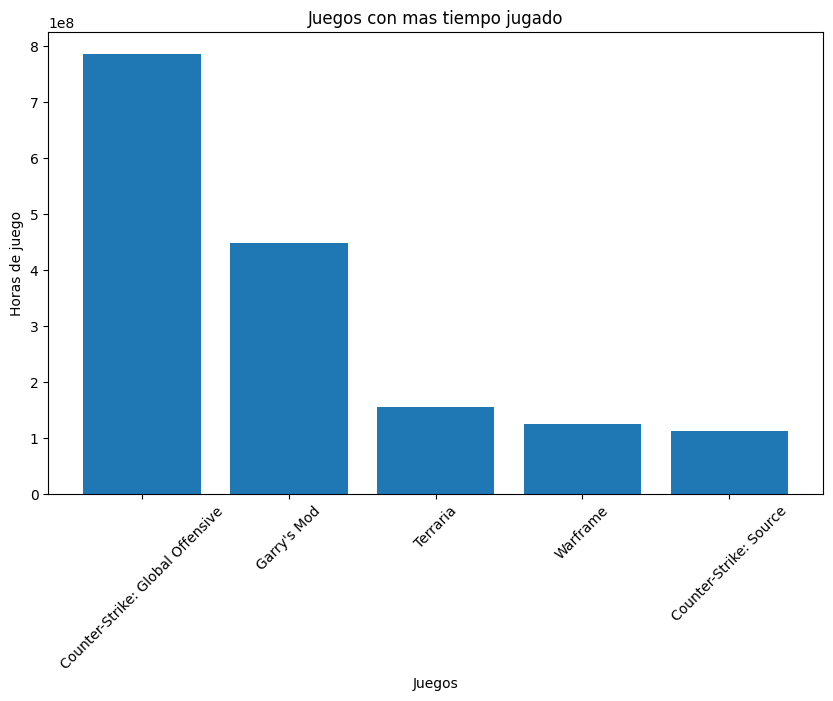

In [188]:

# Creo un grafico de barras para el top 10 de developer con mas usuarios
plt.figure(figsize=(10, 6))
plt.bar(top5["app_name"], top5["playtime_forever"])
plt.xlabel("Juegos")
plt.ylabel("Horas de juego")
plt.title("Juegos con mas tiempo jugado")
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x para mayor legibilidad

plt.show()

# Generos mas jugados

In [161]:
from collections import Counter

In [189]:
#Convierte las columnas de genero en una lista
lista_generos = ['Accounting','Action', 'Adventure', 'Animation &amp; Modeling','Casual','Design &amp; Illustration', 'Early Access','Education','Free to Play', 'Indie', 'Massively Multiplayer','Photo Editing', 'RPG', 'Racing', 'Simulation','Software Training', 'Sports', 'Strategy','Utilities', 'Video Production', 'Web Publishing']
for i in lista_generos:
    items_y_steam[i] = items_y_steam[i].astype('int32')

In [190]:
# Defino una funcion de conteo para usarla con la lista de generos
def conteo_de_frecuencia(df, lista):
    aux_list = []
    for i in lista:
        aux_list.append((i, round((len(df.loc[df[i] == 1])), 2)))
    aux_list = dict(aux_list)
    contador = Counter(aux_list)
    return contador

In [191]:
#Crea y ordena el DataFrame por los valores de frecuencia en orden descendente
lista = conteo_de_frecuencia(items_y_steam, lista_generos)

In [192]:
lista

Counter({'Action': 2808730,
         'Indie': 1764035,
         'Adventure': 1166043,
         'RPG': 911629,
         'Strategy': 803709,
         'Free to Play': 754561,
         'Simulation': 536340,
         'Casual': 500418,
         'Massively Multiplayer': 372342,
         'Early Access': 123862,
         'Sports': 108578,
         'Racing': 102615,
         'Utilities': 9816,
         'Design &amp; Illustration': 8692,
         'Animation &amp; Modeling': 7160,
         'Video Production': 4607,
         'Web Publishing': 3857,
         'Education': 3096,
         'Software Training': 2381,
         'Photo Editing': 596,
         'Accounting': 0})

In [198]:
datos = pd.DataFrame.from_dict(lista, orient="index", columns=["cantidad_usr"]) # pasamos la lista a un dataframe

In [199]:
datos.head()

,cantidad_usr
Accounting,0
Action,2808730
Adventure,1166043
Animation &amp; Modeling,7160
Casual,500418


In [200]:
datos = datos.sort_values(by="cantidad_usr", ascending=False) # la ordenamos de manera descendente

In [201]:
datos.head(1)

,cantidad_usr
Action,2808730


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2068\3353619403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cantidad_usr", y=datos.index, data=datos, palette="Set1")


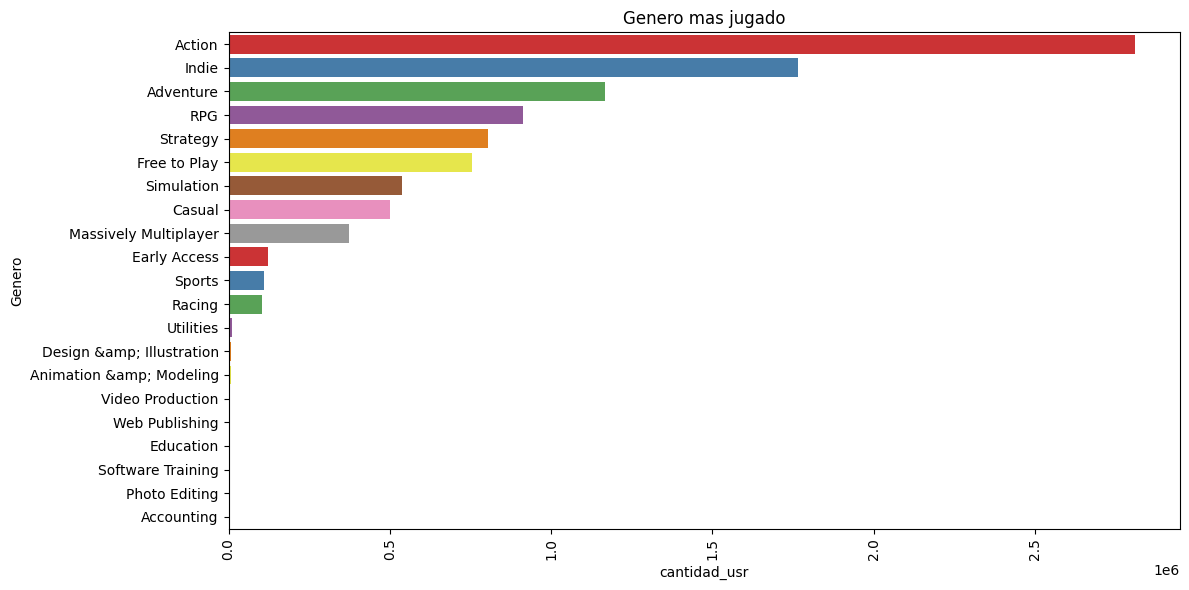

In [202]:
plt.figure(figsize=(12, 6))
sns.barplot(x="cantidad_usr", y=datos.index, data=datos, palette="Set1")

#Rota las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)

plt.xlabel("cantidad_usr")
plt.ylabel("Genero")
plt.title("Genero mas jugado")

#Muestro el gráfico
plt.tight_layout()
plt.show()